In [6]:
import pandas as pd
import causalpy as cp
import matplotlib.pyplot as plt

In [8]:

file_url = "https://raw.githubusercontent.com/PacktPublishing/Causal-Inference-and-Discovery-in-Python/main/data/gt_social_media_data.csv"
data = pd.read_csv(file_url)
data.head()

,date,twitter,linkedin,tiktok,instagram
0,2022-05-15,55,9,23,59
1,2022-05-16,54,18,20,59
2,2022-05-17,54,20,23,57
3,2022-05-18,54,20,21,55
4,2022-05-19,49,23,21,52


In [9]:
#Prep
data.index = pd.to_datetime(data['date'])
data = data.drop('date', axis=1)

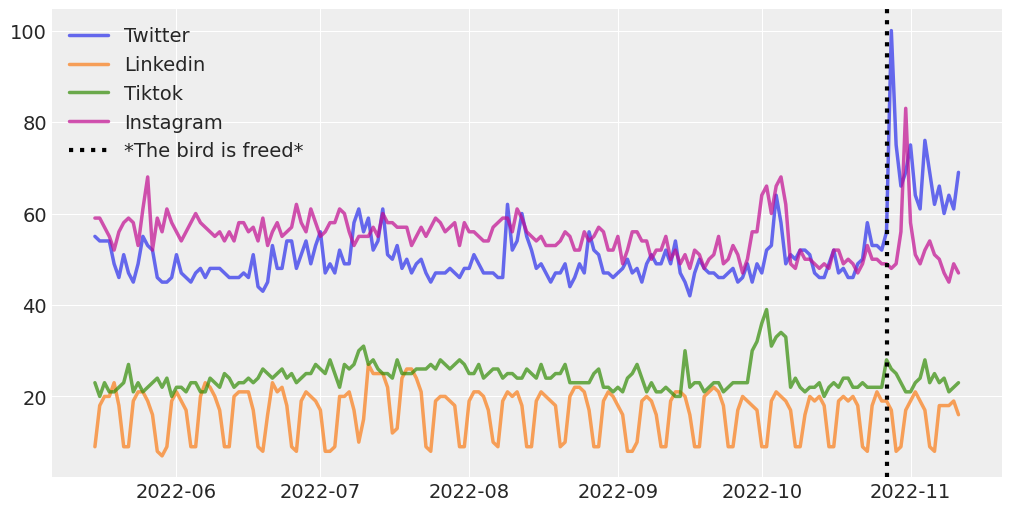

In [10]:
plt.figure(figsize=(10, 5))

for i, series in enumerate(data.columns):
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)

plt.axvline(pd.to_datetime('2022-10-27'), color='black', lw=3, ls='dotted', label='*The bird is freed*')
plt.legend()
plt.show()

In [12]:
treatment_index = pd.to_datetime('2022-10-28')
model = cp.pymc_models.WeightedSumFitter()
formula = 'twitter ~ 0 + tiktok + linkedin + instagram'

results = cp.pymc_experiments.SyntheticControl(
    data,
    treatment_index,
    formula=formula,
    model=model
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


(<Figure size 700x800 with 3 Axes>,
 array([<Axes: title={'center': '\n            Pre-intervention Bayesian $R^2$: 0.386\n            (std = 0.020)\n            '}>,
        <Axes: title={'center': 'Causal Impact'}>,
        <Axes: title={'center': 'Cumulative Causal Impact'}>], dtype=object))

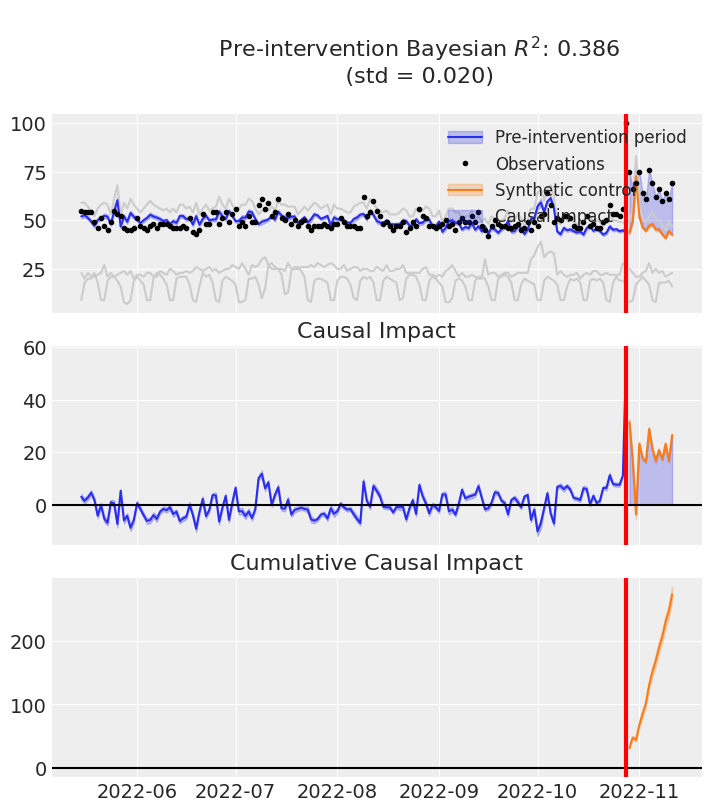

In [13]:
results.plot(plot_predictors=True)

In [15]:
results.summary()

===============================Synthetic Control================================
Formula: twitter ~ 0 + tiktok + linkedin + instagram
Model coefficients:
tiktok                        0.08, 94% HDI [0.01, 0.17]
linkedin                      0.09, 94% HDI [0.01, 0.15]
instagram                     0.84, 94% HDI [0.81, 0.87]
sigma                         5.80, 94% HDI [5.31, 6.33]


In [19]:
results.post_impact

<xarray.DataArray (chain: 4, draw: 1000, obs_ind: 14)>
array([[[31.49132266, 16.42436168, -4.60922217, ..., 22.80952024,
         16.24066199, 26.29003522],
        [32.17439267, 17.21146227, -3.49232069, ..., 23.26542337,
         16.74746819, 26.81084317],
        [31.70251825, 16.66006582, -4.29649054, ..., 22.93904574,
         16.38419059, 26.44289503],
        ...,
        [30.73917396, 15.66813046, -5.3687247 , ..., 22.47247824,
         15.87260867, 25.83439131],
        [31.37721758, 16.4568052 , -4.0978345 , ..., 22.97815991,
         16.43795514, 26.37789067],
        [31.12543441, 16.64574155, -2.46977476, ..., 23.52551647,
         17.0751368 , 26.69692159]],

       [[30.9863155 , 16.34601695, -3.29086209, ..., 23.22446632,
         16.73211793, 26.44213751],
        [30.20781952, 15.61965216, -3.83701511, ..., 22.95977733,
         16.44810551, 26.03064653],
        [30.53948842, 16.08442959, -2.9430219 , ..., 23.30448706,
         16.83625326, 26.3716303 ],
...
        [32.37093385, 17.41386804, -3.27342991, ..., 23.36065929,
         16.85189506, 26.93502345],
        [31.08667899, 16.40374136, -3.37338451, ..., 23.2049519 ,
         16.70695319, 26.45687392],
        [30.21562676, 15.48689079, -4.42782188, ..., 22.75329672,
         16.21007497, 25.88539102]],

       [[31.31549214, 16.64629074, -3.08913637, ..., 23.32614246,
         16.84040983, 26.60881379],
        [31.39994736, 16.72807678, -3.01717201, ..., 23.35931677,
         16.87635733, 26.6566398 ],
        [30.7086661 , 15.96269764, -4.01472847, ..., 22.94450019,
         16.41709398, 26.16283331],
        ...,
        [32.13798964, 17.15250911, -3.62425178, ..., 23.21573118,
         16.69120851, 26.76494788],
        [31.63735425, 16.64121549, -4.16359239, ..., 22.97953532,
         16.43257138, 26.45319788],
        [30.67116833, 15.83509755, -4.43536198, ..., 22.79344836,
         16.24411904, 26.04422549]]])
Coordinates:
  * obs_ind  (obs_ind) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999